In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [10]:
# Load the dataset
file_path = "Netflix Dataset.csv"
df = pd.read_csv(file_path)

In [3]:
#Basic Overview
print("🔹 Dataset Overview:\n")
print(df.info())
print("\n🔹 First 5 Rows:\n")
print(df.head())
print("\n🔹 Missing Values:\n")
print(df.isnull().sum())
print("\n🔹 Duplicate Rows:", df.duplicated().sum())

🔹 Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB
None

🔹 First 5 Rows:

  Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie  

In [4]:
#Descriptive Statistics
print("\n🔹 Descriptive Statistics (Numerical Columns):\n")
print(df.describe())

print("\n🔹 Descriptive Statistics (Categorical Columns):\n")
print(df.describe(include=['object']))


🔹 Descriptive Statistics (Numerical Columns):

       Show_Id Category              Title                Director  \
count     7789     7789               7789                    5401   
unique    7787        2               7787                    4050   
top      s6621    Movie  The Lost Okoroshi  Raúl Campos, Jan Suter   
freq         2     5379                  2                      18   

                      Cast        Country     Release_Date Rating  Duration  \
count                 7071           7282             7779   7782      7789   
unique                6831            681             1565     14       216   
top     David Attenborough  United States  January 1, 2020  TV-MA  1 Season   
freq                    18           2556              118   2865      1608   

                 Type                                        Description  
count            7789                                               7789  
unique            492                                  

In [5]:
#Data Cleaning
df.drop_duplicates(inplace=True)

# Handling missing values (simple example)
df.fillna("Unknown", inplace=True)


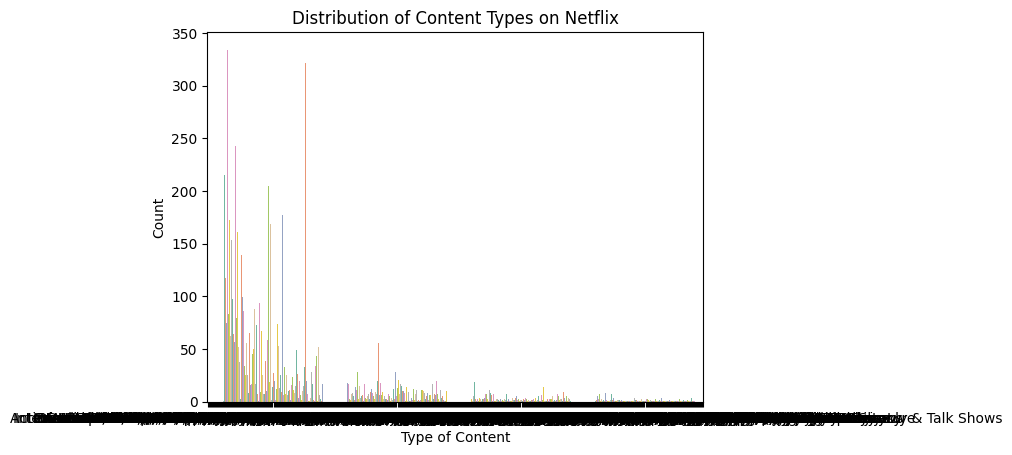

In [12]:
#Content type distibution
sns.countplot(data=df, x='Type', palette='Set2')
plt.title("Distribution of Content Types on Netflix")
plt.xlabel("Type of Content")
plt.ylabel("Count")
plt.show()

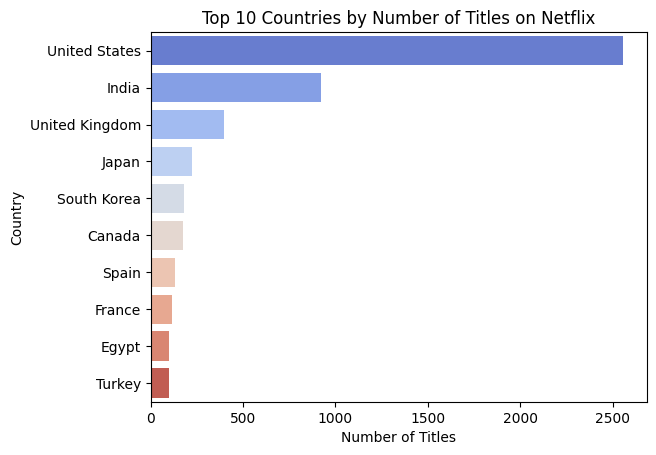

In [14]:
#Top Countries by Number of Titles
top_countries = df['Country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title("Top 10 Countries by Number of Titles on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

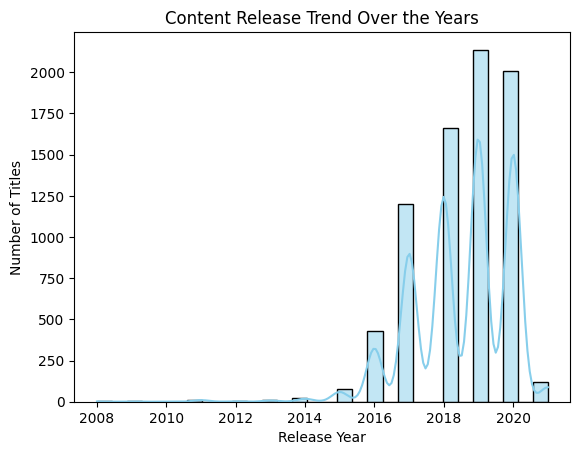

In [16]:
#Trend of Releases Over the Years
df['release_year'] = pd.to_datetime(df['Release_Date'], errors='coerce').dt.year
sns.histplot(df['release_year'], bins=30, kde=True, color='skyblue')
plt.title("Content Release Trend Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.show()

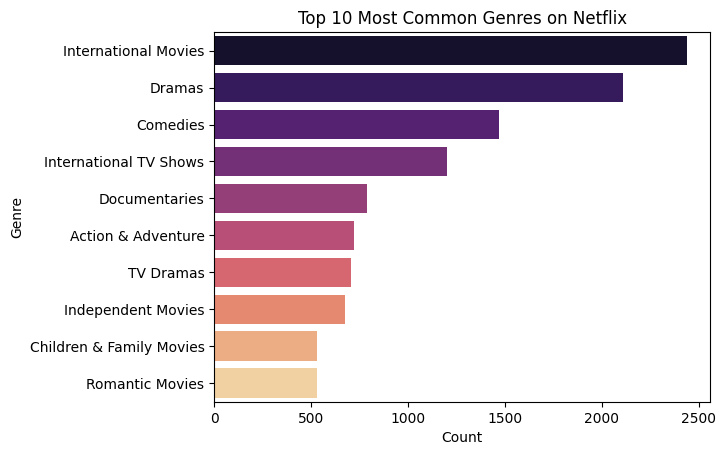

In [18]:
#Top 10 Genres on Netflix
genres = df['Type'].str.split(', ').explode()
top_genres = genres.value_counts().head(10)

sns.barplot(x=top_genres.values, y=top_genres.index, palette='magma')
plt.title("Top 10 Most Common Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

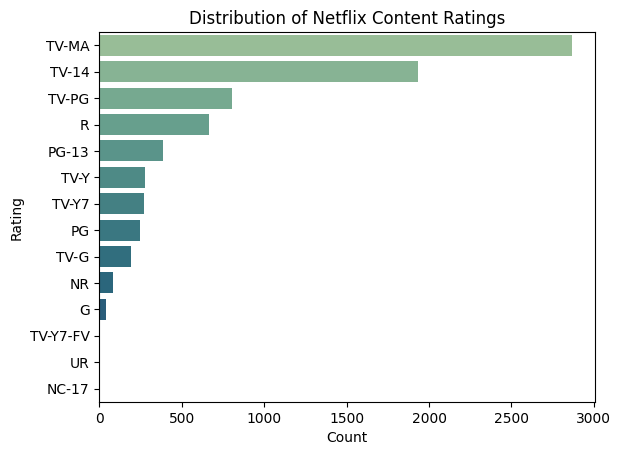

In [20]:
#Ratings Distribution
sns.countplot(data=df, y='Rating', order=df['Rating'].value_counts().index, palette='crest')
plt.title("Distribution of Netflix Content Ratings")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()


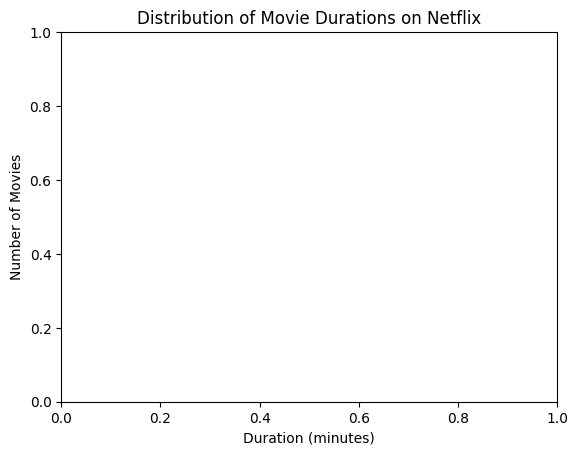

In [22]:
#Duration Distribution
movies = df[df['Type'] == 'Movie'].copy()
movies['duration_min'] = movies['Duration'].str.replace(' min', '').astype(float)

sns.histplot(movies['duration_min'], bins=30, kde=True, color='orange')
plt.title("Distribution of Movie Durations on Netflix")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Movies")
plt.show()

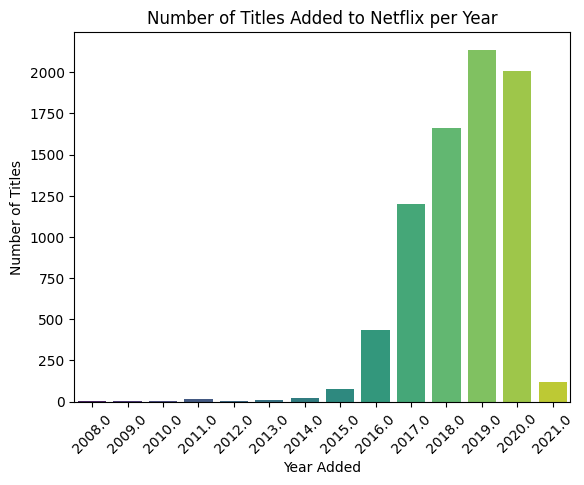

In [24]:
#Growth of Content Added per Year
df['date_added'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

sns.countplot(data=df, x='year_added', palette='viridis')
plt.title("Number of Titles Added to Netflix per Year")
plt.xticks(rotation=45)
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.show()

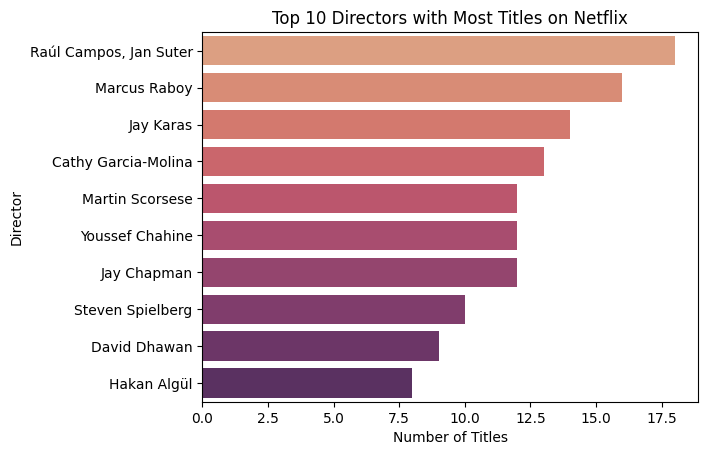

In [26]:
#Most Frequent Directors
top_directors = df['Director'].value_counts().head(10)
sns.barplot(x=top_directors.values, y=top_directors.index, palette='flare')
plt.title("Top 10 Directors with Most Titles on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()

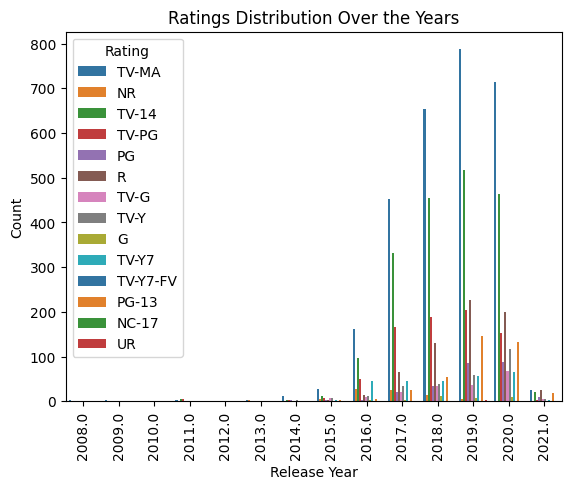

In [28]:
#Relationship Between Rating and Release Year
sns.countplot(data=df, x='release_year', hue='Rating', palette='tab10')
plt.title("Ratings Distribution Over the Years")
plt.xticks(rotation=90)
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.legend(title='Rating')
plt.show()

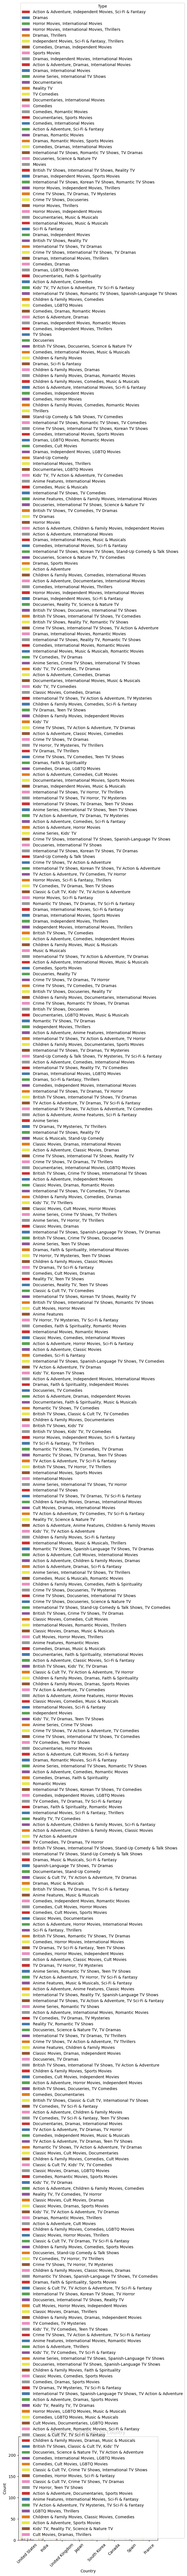

In [30]:
#Country vs. Content Type
top_countries = df['Country'].value_counts().head(8).index
subset = df[df['Country'].isin(top_countries)]

sns.countplot(data=subset, x='Country', hue='Type', palette='Set1')
plt.title("Movies vs TV Shows by Country")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()

In [32]:
#Key Insights Summary
print("\n KEY INSIGHTS:\n")

if 'type' in df.columns:
    movies = df[df['type'] == 'Movie'].shape[0]
    shows = df[df['type'] == 'TV Show'].shape[0]
    print(f"• Movies: {movies} | TV Shows: {shows}")

if 'country' in df.columns:
    top_country = df['country'].value_counts().idxmax()
    print(f"• Country with most titles: {top_country}")

if 'release_year' in df.columns:
    most_year = df['release_year'].value_counts().idxmax()
    print(f"• Peak year of content release: {most_year}")

if 'listed_in' in df.columns:
    top_genre = all_genres.value_counts().idxmax()
    print(f"• Most common genre: {top_genre}")

print("\nData analysis completed successfully!")


 KEY INSIGHTS:

• Peak year of content release: 2019.0

Data analysis completed successfully!
